# Ratios of Gendered Pronouns by Chapter in Middlemarch

In [25]:
import pandas as pd
%matplotlib inline
from ast import literal_eval
import numpy as np
import re
import json
from nltk.corpus import names
from collections import Counter
from matplotlib import pyplot as plt
import spacy
plt.rcParams["figure.figsize"] = [16, 6]
plt.style.use('ggplot')

In [2]:
with open('../middlemarch.txt') as f: 
    mm = f.read()

In [26]:
nlp = spacy.load('en')

In [23]:
# Get chapter locations
chapterMatches = re.finditer('PRELUDE|CHAPTER|FINALE', mm)
chapterLocations = [match.start() for match in chapterMatches]
chapterLocations.append(len(mm)) # Add one to account for last chunk. 

In [24]:
# Get the text of chapters
chapterRanges = list(zip(chapterLocations, chapterLocations[1:]))
chapters = []
for chapterRange in chapterRanges: 
    chapters.append(mm[chapterRange[0]:chapterRange[1]])

In [27]:
# Parse chapters.
docs = [nlp(chapter) for chapter in chapters]

In [68]:
def getPronounRatio(chapter): 
    lenChapter = len(chapter) 
    nMale = len([w for w in chapter if w.text in ['he', 'him', 'his']]) + 1
    nFemale = len([w for w in chapter if w.text in ['she', 'her', 'hers']]) + 1
    mRatio = ( (nMale/lenChapter) / (nFemale/lenChapter) )
    if mRatio > 1: 
        return mRatio
    else: 
        return -((nFemale/lenChapter) / (nMale/lenChapter))

In [69]:
getPronounRatio(docs[0])

-4.999999999999999

In [70]:
ratios = [getPronounRatio(doc) for doc in docs]

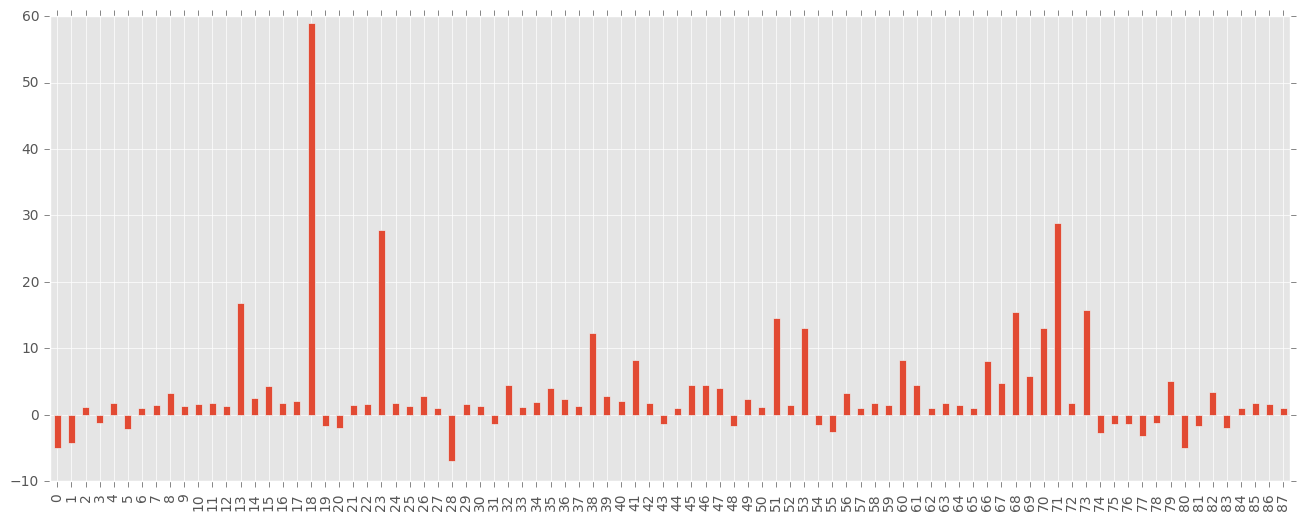

In [71]:
pd.Series(ratios).plot(kind='bar')